In [14]:
def embedding_degree_q(q, r):
    '''returns embedding degree with respect to q'''
    return Mod(q,r).multiplicative_order()

def embedding_degree(E, r):
    '''returns relative embedding degree with respect to E'''
    q = (E.base_field()).order()
    return embedding_degree_q(q, r)

def ext_card(E, deg):
    '''returns curve cardinality over deg-th relative extension'''
    card_low = E.cardinality()
    q = (E.base_field()).order()
    tr = q + 1 - card_low
    s_old, s_new = 2, tr
    for i in [2..deg]:
        s_old, s_new = s_new, tr * s_new - q * s_old
    card_high = q^deg + 1 - s_new
    return card_high

def extend(E, deg):
    '''returns curve over deg-th relative extension'''
    q = E.base_field().order()
    R.<x> = E.base_field()[]
    pol = R.irreducible_element(deg)
    Fext = GF(q^deg, name = 'z', modulus = pol)
    EE = E.base_extend(Fext)
    return EE

def find_least_torsion(E, r):
    for deg in divisors(r^2-1):
        if ext_card(E, deg) % r == 0:
#             assert deg in [1, (r-1)/2, (r^2-1)/2]
            return deg
    return None

def is_torsion_cyclic(E, r, deg):
    card = ext_card(E, deg)
    assert card % r^2 == 0
    m = ZZ(card / r)
    EE = extend(E, deg)
    for j in [1..5]:
        P = EE.random_element()
        if not (m*P == EE(0)):
            return True
    return False

def find_full_torsion(E, r, least):
    p = E.base_field().order()
    q = p^least
    k = embedding_degree_q(q, r)
    if k > 1:
        return k * least
    else:
        card = ext_card(E, least)
        if (card % r^2) == 0 and not is_torsion_cyclic(E, r, least):
            return least
        else:
            return r * least

def find_torsions(E, r):
    least = find_least_torsion(E, r)
    if least == r^2-1:
        full = least
    else:
        full = find_full_torsion(E, r, least)
    return (least, full, full/least)

def find_torsions_across_curves(p, r):
    torsions = []
    F = GF(p)
    for j in [1..p]:
        E = EllipticCurve_from_j(F(j))
        Et = E.quadratic_twist()
        torsions.append(find_torsions(E, r))
        if not E.is_isomorphic(E.quadratic_twist()):
            torsions.append(find_torsions(Et, r))
    return torsions

def plot_torsion_hists(p, r):
    torsions = find_torsions_across_curves(p, r)
    h = histogram(zip(*torsions), label=["p=" + str(p) + ", r=" + str(r)], density = True, linewidth = 1, rwidth = 0.8, bins = r^2-1, range = [1,r^2-1])
    h.xmin(-3)
    h.legend(True)
    h.set_legend_options(loc=2, font_size = 'x-small')
    h.show(aspect_ratio=2.5, axes=False)
#     print len(torsions)

def plot_torsion_hists_across_ps_and_rs(p_interval, r_interval):
    for r in r_interval:
        for p in p_interval:
            if not p==r:
                plot_torsion_hists(p, r)

In [ ]:
p = 0xffffffff00000001000000000000000000000000ffffffffffffffffffffffff
a = 0xffffffff00000001000000000000000000000000fffffffffffffffffffffffc
b = 0x5ac635d8aa3a93e7b3ebbd55769886bc651d06b0cc53b0f63bce3c3e27d2604b
n = 0xffffffff00000000ffffffffffffffffbce6faada7179e84f3b9cac2fc632551
R = GF(p)
E = EllipticCurve(R,[a,b])
E.set_order(n)

# EEE = extend(E,2000)
# print EEE
# %prun s = EEE.cardinality()
# %prun t = ext_card(E,2000)


for r in prime_range(3,500):
    print r
    print find_torsions(E, r)
# find_least_torsion(E,r)
##%prun  = 

# E2 = extend(E, 2)
# print embedding_degree(E2, r)

# find_torsions(E, r)

In [69]:
p = next_prime(30)
R = GF(p)
r = 11

for j in R:
    E = EllipticCurve_from_j(j)
    Et = E.quadratic_twist()
    print find_torsions(E, r)#, find_torsions(Et, r)


(60, 60, 1)
(10, 10, 1)
(20, 20, 1)
(10, 10, 1)
(20, 20, 1)
(5, 5, 1)
(60, 60, 1)
(2, 10, 5)
(30, 30, 1)
(10, 10, 1)
(1, 5, 5)
(30, 30, 1)
(5, 55, 11)
(15, 15, 1)
(5, 5, 1)
(5, 55, 11)
(5, 55, 11)
(30, 30, 1)
(60, 60, 1)
(15, 15, 1)
(10, 110, 11)
(60, 60, 1)
(2, 10, 5)
(20, 20, 1)
(2, 10, 5)
(60, 60, 1)
(60, 60, 1)
(15, 15, 1)
(60, 60, 1)
(60, 60, 1)
(10, 110, 11)


In [ ]:
#try scatter plot for torsion pairs
#compare twists - k1 differs by at most a factor of 2
#improving visuals
#save to git
#improve performance by composite representations of F_p^(ab)

#TO DO: explain why least divides r^2-1 (through division polynomials)


In [ ]:
%%html
<style>
div.input {
    display:none;7000
}
</style>

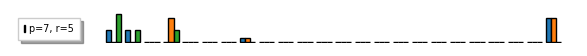

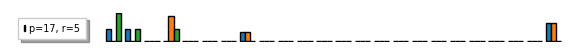

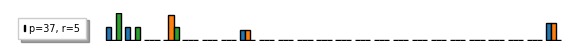

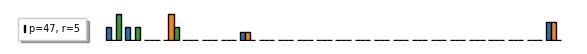

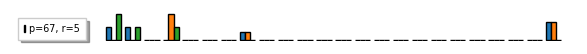

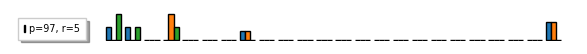

In [33]:
r = 5
ps = []
for i in prime_range(3,100):
    if (i % r) == 2:
        ps.append(i)

plot_torsion_hists_across_ps_and_rs(ps,[r])

In [23]:
p = 13
r = 3
L = find_torsions_across_curves(p, r)
K = [i[1]/i[0] for i in L]
print K.count(1), K.count(2), K.count(3)

8 0 18


In [ ]:
p = next_prime(12)
R = GF(p)
r = 5
E = EllipticCurve_from_j(R(5))
print find_torsions(E, r)

for i in [1..r^2-1]:
    EE = extend(E, i)
    print i, "-th extension:"
    print EE.abelian_group()

(8, 8)
1 -th extension:
Additive abelian group isomorphic to Z/14 embedded in Abelian group of points on Elliptic Curve defined by y^2 = x^3 + x + 4 over Finite Field of size 13
2 -th extension:
Additive abelian group isomorphic to Z/14 + Z/14 embedded in Abelian group of points on Elliptic Curve defined by y^2 = x^3 + x + 4 over Finite Field in z of size 13^2
3 -th extension:
Additive abelian group isomorphic to Z/2198 embedded in Abelian group of points on Elliptic Curve defined by y^2 = x^3 + x + 4 over Finite Field in z of size 13^3
4 -th extension:
Additive abelian group isomorphic to Z/168 + Z/168 embedded in Abelian group of points on Elliptic Curve defined by y^2 = x^3 + x + 4 over Finite Field in z of size 13^4
5 -th extension:
Additive abelian group isomorphic to Z/371294 embedded in Abelian group of points on Elliptic Curve defined by y^2 = x^3 + x + 4 over Finite Field in z of size 13^5
6 -th extension:
Additive abelian group isomorphic to Z/2198 + Z/2198 embedded in Abelia

In [149]:
p = next_prime(50)
R = GF(p)
r = next_prime(18)
print p % r

for j in R:
    E = EllipticCurve_from_j(j)
    torsions = find_torsions(E,r)
    pol = E.division_polynomial(r)
    S.<x> = PolynomialRing(R)
#     print S(pol).degree()
    degs = []
    for f in factor(S(pol)):
        degs.append(f[0].degree())
    print "(k1,k2):", torsions, "\t irreducible factor degs:", degs
#     print E.is_supersingular()
#     assert (not E.is_supersingular() ) or Set(degs).cardinality() == 1
    m = min(degs)
    for d in degs:
        assert (r-1)/2 % m == 0 or m % (r-1)/2 == 0
#     print extend(E, 1).abelian_group()
#     print extend(E, 2).abelian_group()
#     print extend(E, 3).abelian_group()
#     assert torsions[0] in [degs[0], 2*degs[0]]
#     assert torsions[1] in [lcm(degs), 2*lcm(degs)]
#     print factor(S(pol))

15
(k1,k2): (9, 18, 2) 	 irreducible factor degs: [9, 9, 18, 18, 18, 18, 18, 18, 18, 18, 18]
(k1,k2): (360, 360, 1) 	 irreducible factor degs: [180]
(k1,k2): (9, 18, 2) 	 irreducible factor degs: [9, 9, 18, 18, 18, 18, 18, 18, 18, 18, 18]
(k1,k2): (6, 18, 3) 	 irreducible factor degs: [3, 3, 3, 9, 18, 18, 18, 18, 18, 18, 18, 18, 18]
(k1,k2): (360, 360, 1) 	 irreducible factor degs: [180]
(k1,k2): (360, 360, 1) 	 irreducible factor degs: [180]
(k1,k2): (6, 18, 3) 	 irreducible factor degs: [3, 3, 3, 9, 18, 18, 18, 18, 18, 18, 18, 18, 18]
(k1,k2): (360, 360, 1) 	 irreducible factor degs: [180]
(k1,k2): (360, 360, 1) 	 irreducible factor degs: [180]
(k1,k2): (360, 360, 1) 	 irreducible factor degs: [180]
(k1,k2): (360, 360, 1) 	 irreducible factor degs: [180]
(k1,k2): (360, 360, 1) 	 irreducible factor degs: [180]
(k1,k2): (360, 360, 1) 	 irreducible factor degs: [180]
(k1,k2): (360, 360, 1) 	 irreducible factor degs: [180]
(k1,k2): (360, 360, 1) 	 irreducible factor degs: [180]
(k1,k2): 

In [ ]:
def torsion_possibilities(r): #it seems all of these can really occur
    poss = []
    for i in divisors(r^2-1):
        multipliers = set([Mod(h,r).multiplicative_order() for h in set([l^i for l in Integers(r)]).difference(set([0]))]).union([1,r])
#         print i, multipliers
        for j in multipliers:
            if i*j <= r^2-1:
                poss.append((i,i*j))
    return poss

def find_torsion_frequencies(p,r):
    torsions = find_torsions_across_curves(p,r)
    torsions_short = map(lambda x: x[:2], torsions)
    poss = torsion_possibilities(r)
    freq = []
    for pos in poss:
        freq.append((pos, torsions_short.count(pos)))
    return freq

def plot_torsion_frequencies(p,r):
    b = bar_chart([f[1] for f in freq], width=0.5)
    b.show(aspect_ratio=1)

In [72]:
r = 7
for p in prime_range(10,20):
    print p
    freq = find_torsion_frequencies(p,r)
    print freq
    print [f[1] for f in freq]
#     plot_torsion_frequencies(p,r)
    print "-------------------------"
    

11
[((1, 1), 0), ((1, 2), 0), ((1, 3), 3), ((1, 6), 0), ((1, 7), 0), ((2, 2), 0), ((2, 6), 3), ((2, 14), 0), ((3, 3), 0), ((3, 6), 0), ((3, 21), 4), ((4, 4), 0), ((4, 12), 0), ((4, 28), 0), ((6, 6), 0), ((6, 42), 4), ((8, 8), 0), ((8, 24), 0), ((12, 12), 3), ((16, 16), 0), ((16, 48), 0), ((24, 24), 4), ((48, 48), 0)]
[0, 0, 3, 0, 0, 0, 3, 0, 0, 0, 4, 0, 0, 0, 0, 4, 0, 0, 3, 0, 0, 4, 0]
-------------------------
13
[((1, 1), 0), ((1, 2), 2), ((1, 3), 0), ((1, 6), 0), ((1, 7), 0), ((2, 2), 0), ((2, 6), 0), ((2, 14), 0), ((3, 3), 0), ((3, 6), 10), ((3, 21), 0), ((4, 4), 0), ((4, 12), 0), ((4, 28), 0), ((6, 6), 0), ((6, 42), 0), ((8, 8), 0), ((8, 24), 0), ((12, 12), 0), ((16, 16), 14), ((16, 48), 0), ((24, 24), 0), ((48, 48), 0)]
[0, 2, 0, 0, 0, 0, 0, 0, 0, 10, 0, 0, 0, 0, 0, 0, 0, 0, 0, 14, 0, 0, 0]
-------------------------
17
[((1, 1), 0), ((1, 2), 0), ((1, 3), 0), ((1, 6), 5), ((1, 7), 0), ((2, 2), 0), ((2, 6), 5), ((2, 14), 0), ((3, 3), 0), ((3, 6), 6), ((3, 21), 0), ((4, 4), 0), ((4,

[((1, 1), 0), ((1, 2), 9), ((1, 3), 0), ((2, 2), 0), ((2, 6), 0), ((4, 4), 0), ((8, 8), 12)] 7
[0, 9, 0, 0, 0, 0, 12]


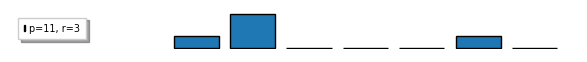

In [40]:
p = 11
r = 3
print freq, len(freq)
print [f[1] for f in freq]
h = histogram([1,9,3,3,4], label=["p=" + str(p) + ", r=" + str(r)], density = True, linewidth = 1, rwidth = 0.8, bins = len(freq), range = [1,len(freq)+5])
h.xmin(-3)
h.legend(True)
h.set_legend_options(loc=2, font_size = 'x-small')
h.show(aspect_ratio=2.5, axes=False)

In [179]:
p = next_prime(10)
R = GF(p)
R2 = GF(r^2)
r = next_prime(18)

for j in R:
    E = EllipticCurve_from_j(j)
    roots = E.frobenius_polynomial().roots(R2)
    a = roots[0][0]
    b = roots[-1][0]
#     print E.frobenius_matrix()
    print R2(ext_card(E, 2)), p^2 + 1 - a^2 - b^2

11 11
11 11
14 14
13 13
2 2
5 5
10 10
7 7
14 14
7 7
2 2


In [238]:
r = 31
primes = set([])
primes2 = []
for p in Primes():
    if r < ceil(8 * sqrt(p)):
        primes.add(Mod(p,r))
        primes2.append(p)
        if len(primes) == r-1:
            break
    
for p in primes2:
    if p == r or p == 2:
        continue
    print "p:", Mod(p,r), "ord p:", Mod(p,r).multiplicative_order()
    ords = []
    R = GF(p)
    for j in R:
        curves = []
        E = EllipticCurve_from_j(j)
        curves.append(E)
        Et = E.quadratic_twist()
        if not Et.is_isomorphic(E):
            curves.append(Et)
            
        
        for curve in curves:
            roots = curve.frobenius_polynomial().roots(GF(r^2))
            a = roots[0][0]
            b = roots[-1][0]
            
            if (a in GF(r) and b in GF(r)):
#                 print a.multiplicative_order(), b.multiplicative_order()
                ords.append(tuple(sorted([a.multiplicative_order(), b.multiplicative_order()])))
    print sorted(Set(ords))

p: 17 ord p: 30
[(3, 30), (5, 30), (6, 15), (10, 15), (15, 30)]
p: 19 ord p: 15
[(3, 5), (5, 15), (6, 10), (10, 30), (15, 15), (30, 30)]
p: 23 ord p: 10
[(1, 10), (2, 5), (3, 30), (5, 10), (6, 15), (15, 30)]
p: 29 ord p: 10
[(1, 10), (2, 5), (5, 10), (15, 30)]
p: 6 ord p: 6
[(1, 6), (2, 3), (3, 6), (5, 30), (10, 15), (15, 30)]
p: 10 ord p: 15
[(1, 15), (2, 30), (3, 5), (5, 15), (6, 10), (10, 30), (15, 15), (30, 30)]
p: 12 ord p: 30
[(3, 10), (3, 30), (5, 6), (5, 30), (6, 15), (10, 15), (15, 30)]
p: 16 ord p: 5
[(3, 15), (5, 5), (6, 30), (10, 10), (15, 15), (30, 30)]
p: 22 ord p: 30
[(1, 30), (2, 15), (3, 10), (3, 30), (5, 6), (5, 30), (6, 15), (10, 15), (15, 30)]
p: 28 ord p: 15
[(1, 15), (2, 30), (3, 5), (3, 15), (5, 15), (6, 10), (6, 30), (10, 30), (15, 15), (30, 30)]
p: 30 ord p: 2
[(1, 2), (3, 6), (5, 10), (15, 30)]
p: 5 ord p: 3
[(1, 3), (2, 6), (3, 3), (5, 15), (6, 6), (10, 30), (15, 15), (30, 30)]
p: 9 ord p: 15
[(1, 15), (2, 30), (3, 5), (3, 15), (5, 15), (6, 10), (6, 30), (10,

In [223]:
print Primes()[:20]

[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71]


In [230]:
r = 31
primes = set([])
primes2 = []
for p in Primes():
    primes.add(Mod(p,r))
    primes2.append(p)
    if len(primes) == r-1:
        break
        
print primes2

[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97, 101, 103, 107, 109, 113, 127, 131, 137, 139, 149, 151, 157, 163, 167, 173, 179, 181]


In [3]:
load("curves.sage")

In [4]:
curve_db = import_curve_db()

In [5]:
print curve_db

{'anssi': {u'name': u'ANSSI', u'curves': [{u'category': u'anssi', u'name': u'FRP256v1', u'form': u'Weierstrass', u'characteristics': {u'conductor': u'1', u'discriminant': u'36852496142108626283186094975130945312915652343771992238361306471587988304996', u'trace_of_frobenius': u'-35197163533674495870879651530057169373', u'anomalous': False, u'j_invariant': u'40896549830710972397896969473453290820546317441961689722588313512802554631657', u'embedding_degree': u'18242428555282879769611787505122521357667424468567068775512033867954346593872', u'torsion_degrees': [{u'r': 2, u'full': 3, u'least': 3}, {u'r': 3, u'full': 8, u'least': 8}, {u'r': 5, u'full': 12, u'least': 12}, {u'r': 7, u'full': 6, u'least': 2}], u'supersingular': False, u'cm_disc': u'437818285326789114470682900122940512583912595755008627124676173876314146744809'}, u'generator': {u'y': u'0x6142e0f7c8b204911f9271f0f3ecef8c2701c307e8e4c9e183115a1554062cfb', u'x': u'0xb6b3d4c356c139eb31183d4749d423958c27d2dcaf98b70164c97a2dd98f5cff'},

In [6]:
!l

comords.txt	     factor_near_orders.ipynb	     scalar_mult.ipynb
Curve_handler.ipynb  find_torsion.ipynb		     test.json
curves_json	     k1k2.ipynb
curves.sage	     near_order_largest_factors.txt
